# Active Contours using Parameteric Curves

This tour explores image segmentation using parametric active contours.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.

In [1]:
from __future__ import division
from nt_toolbox.general import *
from nt_toolbox.signal import *
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ayman\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Parameteric Curves
-------------------

In this tours, the active contours are represented using parametric
curve $ \ga : [0,1] \rightarrow \RR^2 $. 


This curve is discretized using a piewise linear curve with 
$p$ segments, and is stored as a complex vector of points in the plane
$\ga \in \CC^p$.

Initial polygon.

In [2]:
gamma0 = array([.78, .14, .42, .18, .32, .16, .75, .83, .57, .68, .46, .40, .72, .79, .91, .90]) + 1j*array([.87, .82, .75, .63, .34, .17, .08, .46, .50, .25, .27, .57, .73, .57, .75, .79])


Display the initial curve.

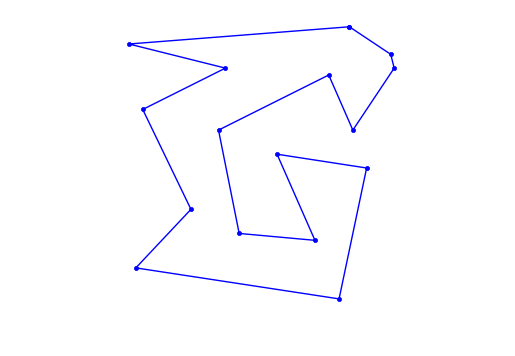

In [3]:
periodize = lambda gamma: concatenate((gamma, [gamma[0]]))
def cplot(gamma,s='b',lw=1): 
    plot(real(periodize(gamma)), imag(periodize(gamma)), s, linewidth=lw)
    axis('equal')
    axis('off')
cplot(gamma0,'b.-');

Number of points of the discrete curve.

In [4]:
p = 256

Shortcut to re-sample a curve according to arc length.

In [5]:
interpc = lambda x,xf,yf: interp(x,xf,real(yf)) + 1j * interp(x,xf,imag(yf))
curvabs = lambda gamma: concatenate( ([0], cumsum( 1e-5 + abs(gamma[:-1:]-gamma[1::]) ) ) )
resample1 = lambda gamma,d: interpc(arange(0,p)/float(p),  d/d[-1],gamma)
resample = lambda gamma: resample1( periodize(gamma), curvabs(periodize(gamma)) )

Initial curve $ \ga_1(t)$.

In [6]:
gamma1 = resample(gamma0)

Display the initial curve.

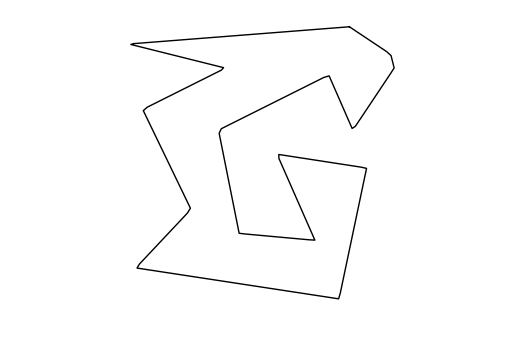

In [7]:
cplot(gamma1, 'k')

Shortcut for forward and backward finite differences.

In [8]:
shiftR = lambda c: concatenate( ([c[-1]],c[:-1:]) )
shiftL = lambda c: concatenate( (c[1::],[c[0]]) )
BwdDiff = lambda c: c - shiftR(c)
FwdDiff = lambda c: shiftL(c) - c

The tangent to the curve is computed as
$$ t_\ga(s) = \frac{\ga'(t)}{\norm{\ga'(t)}} $$
and the normal is $ n_\ga(t) = t_\ga(t)^\bot. $

Shortcut to compute the tangent and the normal to a curve.

In [9]:
normalize = lambda v: v/maximum(abs(v),1e-10)
tangent = lambda gamma: normalize( FwdDiff(gamma) )
normal = lambda gamma: -1j*tangent(gamma)

Move the curve in the normal direction, by computing $ \ga_1(t) \pm \delta n_{\ga_1}(t) $.

In [10]:
delta = .03
gamma2 = gamma1 + delta * normal(gamma1)
gamma3 = gamma1 - delta * normal(gamma1)

Display the curves.

(0.13822079913787064,
 0.93899831377290144,
 0.053329237592183554,
 0.89990886424047734)

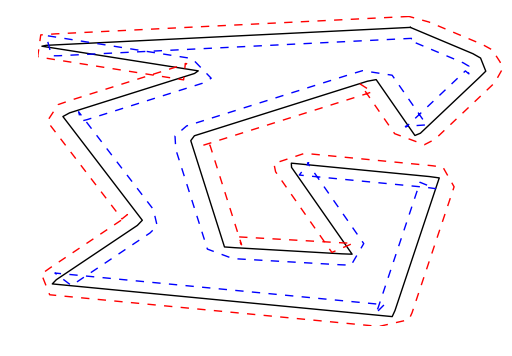

In [11]:
cplot(gamma1, 'k')
cplot(gamma2, 'r--')
cplot(gamma3, 'b--')
axis('tight') 
axis('off')

## Evolution by Mean Curvature

A curve evolution is a series of curves $ s \mapsto \ga_s $ indexed by
an evolution parameter $s \geq 0$. The intial curve $\ga_0$ for
$s=0$ is evolved, usually by minizing some energy $E(\ga)$ in a gradient descent
$$ \frac{\partial \ga_s}{\partial s} = \nabla E(\ga_s). $$


Note that the gradient of an energy is defined with respect to the
curve-dependent inner product
$$ \dotp{a}{b} = \int_0^1 \dotp{a(t)}{b(t)} \norm{\ga'(t)} d t.  $$
The set of curves can thus be thought as being a Riemannian surface.


The simplest evolution is the mean curvature evolution.
It corresponds to minimization of the curve length
$$ E(\ga) = \int_0^1 \norm{\ga'(t)} d t $$


The gradient of the length is 
$$ \nabla E(\ga)(t) = -\kappa_\ga(t) n_\ga(t)  $$
where $ \kappa_\ga $ is the curvature, defined as
$$ \kappa_\ga(t) = \frac{1}{\norm{\ga'(t)}} \dotp{ t_\ga'(t) }{ n_\ga(t) } . $$



Shortcut for normal times curvature $ \kappa_\ga(t) n_\ga(t) $.

In [12]:
normalC = lambda gamma: BwdDiff(tangent(gamma)) / abs( FwdDiff(gamma) )

Time step for the evolution.
It should be very small because we use an explicit time stepping and the
curve has strong curvature.

In [13]:
dt = 0.001 / 100

Number of iterations.

In [14]:
Tmax = 3.0 / 100
niter = round(Tmax/dt)

Initialize the curve for $s=0$.

In [15]:
gamma = gamma1

Evolution of the curve.

In [16]:
gamma = gamma + dt * normalC(gamma)

To stabilize the evolution, it is important to re-sample the curve so
that it is unit-speed parametrized. You do not need to do it every time
step though (to speed up).

In [17]:
gamma = resample(gamma)

**Exercise 1:** Perform the curve evolution.
You need to resample it a few times.

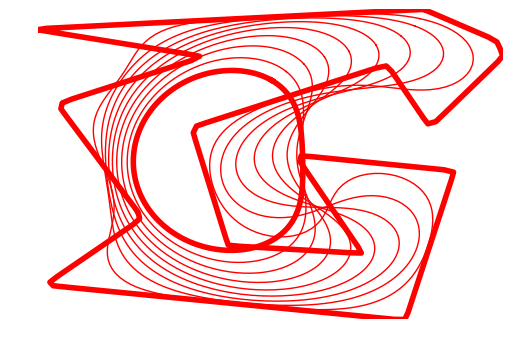

In [18]:
# run -i nt_solutions/segmentation_2_snakes_param/exo1

gamma = gamma1
displist = around(linspace(0,niter,10))
k = 0;
for i in arange(0,niter+1):
    gamma = resample( gamma + dt * normalC(gamma) );
    if i==displist[k]:
        lw = 1;
        if i==0 or i==niter:
            lw = 4;
        cplot(gamma, 'r', lw);
        k = k+1;
        axis('tight');  axis('off');

## Geodesic Active Contours

Geodesic active contours minimize a weighted length
$$ E(\ga) = \int_0^1 W(\ga(t)) \norm{\ga'(t)} d t, $$
where $W(x)>0$ is the geodesic metric, that should be small in areas
where the image should be segmented.

Size of the image $n$.

In [19]:
n = 200

Create a synthetic weight $W(x)$.

In [20]:
nbumps = 40
theta = random.rand(nbumps,1)*2*pi
r = .6*n/2
a = array([.62*n,.6*n])
x = around( a[0] + r*cos(theta) )
y = around( a[1] + r*sin(theta) )
W = zeros([n,n])
for i in arange(0,nbumps):
    W[int(x[i]),int(y[i])] = 1
W = gaussian_blur(W,6.0)
W = rescale( -minimum(W,.05), .3,1)

Display the metric $W$.

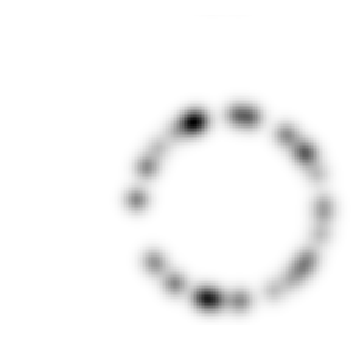

In [21]:
imageplot(W)

Pre-compute the gradient $\nabla W(x)$ of the metric.

In [22]:
G = grad(W)
G = G[:,:,0] + 1j*G[:,:,1]

Display the image of the magnitude $\norm{\nabla W(x)}$ of the gradient.

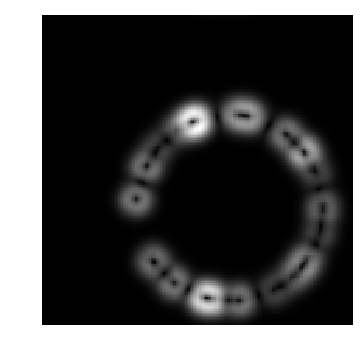

In [23]:
imageplot(abs(G))

Shortcut to evaluate the gradient and the potential along a curve.

In [24]:
EvalG = lambda gamma: bilinear_interpolate(G, imag(gamma), real(gamma))
EvalW = lambda gamma: bilinear_interpolate(W, imag(gamma), real(gamma))

Create a circular curve $\ga_0$.

In [60]:
r = .98*n/2 # radius
p = 128 # number of points on the curve
theta = transpose( linspace(0, 2*pi, p + 1) )
theta = theta[0:-1]
gamma0 = n/2 * (1 + 1j) +  r*(cos(theta) + 1j*sin(theta))

Initialize the curve at time $t=0$ with a circle.

In [61]:
gamma = gamma0

For this experiment, the time step should be larger, because the
curve is in $[0,n-1] \times [0,n-1]$.

In [62]:
dt = 1

Number of iterations.

In [63]:
Tmax = 5000
niter = round(Tmax/ dt)

Display the curve on the background.

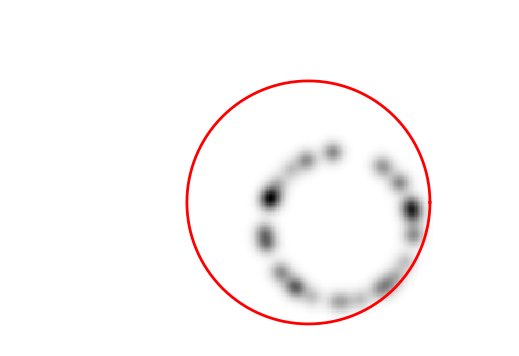

In [64]:
lw = 2
clf
imageplot(transpose(W))
cplot(gamma, 'r', lw)

The gradient of the energy is
$$ \nabla E(\ga) = -W(\ga(t)) \kappa_\ga(t) n_\ga(t) + \dotp{\nabla W(\ga(t))}{ n_\ga(t) } n_\ga(t). $$

Pointwise innerproduct on the curve.

In [65]:
dotp = lambda c1,c2: real(c1)*real(c2) + imag(c1)*imag(c2)

Evolution of the curve according to this gradient.

In [66]:
N = normal(gamma)
g = - EvalW(gamma) * normalC(gamma) + dotp(EvalG(gamma), N) * N
# gamma = gamma - dt*g
gamma - dt*g

array([ 197.98584752 +99.99990027j,  197.86480627+104.80761316j,
        197.50935197+109.60361286j,  196.92131334+114.37671384j,
        196.09953400+119.1151888j ,  195.04207717+123.80649793j,
        193.75365075+128.43938883j,  192.24694983+133.00605793j,
        190.52281400+137.49553711j,  188.57770901+141.89400807j,
        186.41286942+146.1884232j ,  184.03644359+150.36906963j,
        181.46283182+154.43123923j,  178.69408770+158.36301657j,
        175.73212637+162.15108119j,  172.58672732+165.78785728j,
        169.26791466+169.26677726j,  165.78345075+172.57952606j,
        162.14585830+175.72374034j,  158.36131198+178.69027988j,
        154.43447348+181.46644791j,  150.37230441+184.04065509j,
        146.18718267+186.40955084j,  141.89214710+188.57292899j,
        137.49669017+190.52457663j,  133.00984908+192.25588633j,
        128.44345220+193.7650092j ,  123.80879361+195.04965796j,
        119.11657541+196.10529714j,  114.37802479+196.9286786j ,
        109.60466819+197.

To avoid the curve from being poorly sampled, it is important to
re-sample it evenly.

In [68]:
gamma = resample(gamma)
resample(gamma)

array([ 198.00000000+100.j        ,  197.88195471+104.80863208j,
        197.52810321+109.60567975j,  196.93929798+114.3795865j ,
        196.11695748+119.11885156j,  195.06306281+123.81205763j,
        193.78015290+128.44789837j,  192.27131839+133.01520563j,
        190.54019419+137.50297637j,  188.59095073+141.90039916j,
        186.42828391+146.19688021j,  184.05740378+150.38206893j,
        181.48402201+154.44588284j,  178.71433809+158.37853184j,
        175.75502443+162.17054185j,  172.61321028+165.81277758j,
        169.29646456+169.29646456j,  165.81277758+172.61321028j,
        162.17054185+175.75502443j,  158.37853184+178.71433809j,
        154.44588284+181.48402201j,  150.38206893+184.05740378j,
        146.19688021+186.42828391j,  141.90039916+188.59095073j,
        137.50297637+190.54019419j,  133.01520563+192.27131839j,
        128.44789837+193.7801529j ,  123.81205763+195.06306281j,
        119.11885156+196.11695748j,  114.37958650+196.93929798j,
        109.60567975+197.

**Exercise 2:** Perform the curve evolution.

array([ 177.93102548 +97.94037306j,  179.24619634+100.42843337j,
        180.43094628+102.98117391j,  181.33800527+105.64525595j,
        181.88471485+108.40590211j,  182.17511023+111.2051476j ,
        182.30155754+114.01657554j,  182.32417741+116.83075506j,
        182.25882581+119.64426663j,  182.08126082+122.45292971j,
        181.73233099+125.24548434j,  181.17270166+128.00354916j,
        180.43745921+130.72007834j,  179.58779407+133.40302193j,
        178.67036665+136.06355669j,  177.71106229+138.70928032j,
        176.71510922+141.34142696j,  175.66539446+143.95259859j,
        174.51809454+146.52238853j,  173.25676465+149.03817138j,
        171.89522230+151.50116134j,  170.44176866+153.9110555j ,
        168.89692036+156.26340772j,  167.22024178+158.52368699j,
        165.41372170+160.68160222j,  163.48099835+162.72725449j,
        161.39886711+164.62062044j,  159.17216684+166.34164008j,
        156.80448794+167.86288742j,  154.34438318+169.22963387j,
        151.81121316+170.

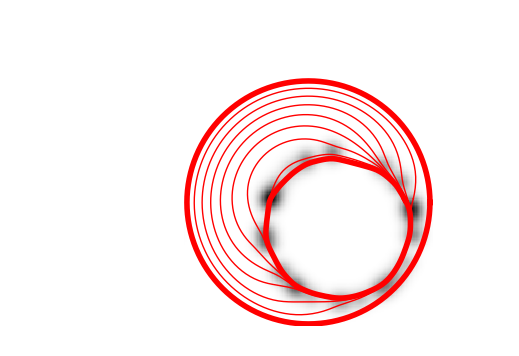

In [80]:
# run -i nt_solutions/segmentation_2_snakes_param/exo2

gamma = gamma0;
displist = around(linspace(0,niter,10))
k = 0;
clf; 
imageplot(transpose(W));
track  = gamma
for i in arange(0, niter + 1):
    N = normal(gamma);
    g = EvalW(gamma) * normalC(gamma) - dotp(EvalG(gamma), N) * N;
    gamma = resample( gamma + dt*g );
    track = gamma
    if i==displist[k]:   
        lw = 1;
        if i==0 or i==niter:
            lw = 4;
        cplot(gamma, 'r', lw);
        k = k+1;
        axis('equal'); axis('off');

track



# Medical Image Segmentation

One can use a gradient-based metric to perform edge detection in medical
images.

Load an image $f$.

In [34]:
n = 256
name = 'nt_toolbox/data/cortex.bmp'
f = load_image(name, n)

Display.

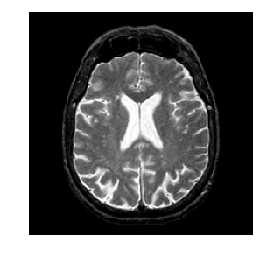

In [35]:
imageplot(f)

An edge detector metric can be defined as a decreasing function of the
gradient magnitude.
$$ W(x) = \psi( d \star h_a(x) )
      \qwhereq d(x) = \norm{\nabla f(x)}. $$
where $h_a$ is a blurring kernel of width $a>0$.

Compute the magnitude of the gradient.

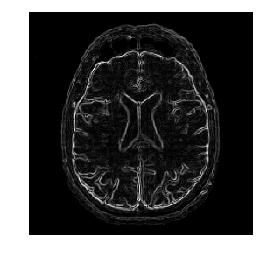

In [36]:
G = grad(f)
d0 = sqrt(sum(G**2, 2))
imageplot(d0)

Blur it by $h_a$.

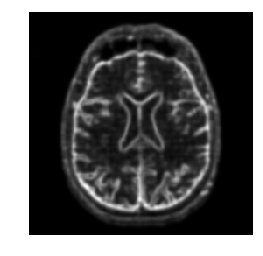

In [37]:
a = 2
d = gaussian_blur(d0, a)
imageplot(d)

Compute a decreasing function of the gradient to define $W$.

In [38]:
d = minimum(d, .4)
W = rescale(-d, .8, 1)

Display it.

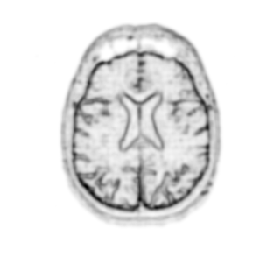

In [39]:
imageplot(W)

Number of points.

In [40]:
p = 128

**Exercise 3:** Create an initial circle $\gamma_0$ of $p$ points. When plotting the image, you need to transpose it to have axis coherent with the cplot.

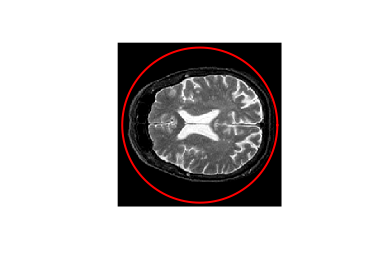

In [41]:
run -i nt_solutions/segmentation_2_snakes_param/exo3

Step size.

In [42]:
dt = 2

Number of iterations.

In [43]:
Tmax = 9000
niter = round(Tmax/ dt)

**Exercise 4:** Perform the curve evolution.

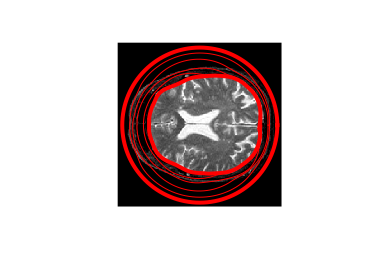

In [44]:
run -i nt_solutions/segmentation_2_snakes_param/exo4

# Evolution of a Non-closed Curve

It is possible to perform the evolution of a non-closed curve by adding
boundary constraint
$$ \ga(0)=x_0 \qandq \ga(1)=x_1. $$


In this case, the algorithm find a local minimizer of the geodesic
distance between the two points.


Note that a much more efficient way to solve this problem is to use the
Fast Marching algorithm to find the global minimizer of the geodesic
length.


Load an image $f$.

In [45]:
n = 256
f = load_image(name, n)
f = f[45:105, 60:120]
n = f.shape[0]

Display.

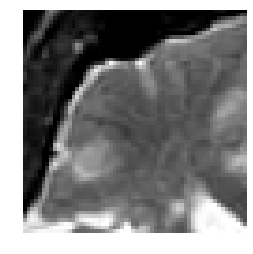

In [46]:
imageplot(f)

**Exercise 5:** Compute an edge attracting criterion $W(x)>0$, that is small in area of strong
gradient.

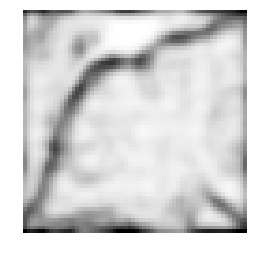

In [47]:
run -i nt_solutions/segmentation_2_snakes_param/exo5

Start and end points $x_0$ and $x_1$.

In [48]:
x0 = 4 + 55j
x1 = 53 + 4j

Initial curve $\ga_0$.

In [49]:
p = 128
t = transpose(linspace(0, 1, p))
gamma0 = t*x1 + (1-t)*x0

Initialize the evolution.

In [50]:
gamma = gamma0

Display.

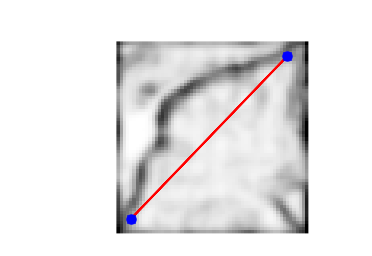

In [51]:
clf
imageplot(transpose(W))
cplot(gamma,'r', 2)
plot(real(gamma[0]), imag(gamma[0]), 'b.', markersize=20)
plot(real(gamma[-1]), imag(gamma[-1]), 'b.', markersize=20);

Re-sampling for non-periodic curves.

In [52]:
curvabs = lambda gamma: concatenate( ([0], cumsum( 1e-5 + abs(gamma[:-1:]-gamma[1::]) ) ) )
resample1 = lambda gamma,d: interpc(arange(0,p)/float(p-1),  d/d[-1],gamma)
resample = lambda gamma: resample1( gamma, curvabs(gamma) )

Time step.

In [53]:
dt = 1/10

Number of iterations.

In [54]:
Tmax = 2000*4/ 7
niter = round(Tmax/ dt)

**Exercise 6:** Perform the curve evolution.
Be careful to impose the boundary conditions at each step.

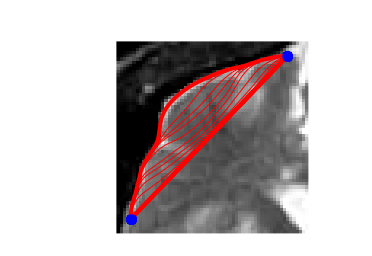

In [55]:
run -i nt_solutions/segmentation_2_snakes_param/exo6